In [1]:
import matplotlib.pylab as plt
import pickle
import numpy as np
import os

In [2]:
import pandas as pd

In [3]:
import ising

In [4]:
plt.style.use('default')
plt.rc('figure', figsize = (15,8))
plt.rc('axes', labelsize=24)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [5]:
sizes = [2, 4, 8, 16]
mcsteps = [1e4, 1e5, 5e5]

In [6]:
ising.main(sizes=sizes, mcsteps=mcsteps)

In [7]:
from itertools import product, cycle

In [8]:
results = {s: {} for s in sizes}
for size, resultsize in results.items():
    resultsize.update({nsteps: {} for nsteps in mcsteps})
for size, steps in product(sizes, mcsteps):
    results[size][steps] = pd.read_csv(f'results_{size}x{size}_{steps}.dat', header=0)

In [9]:
markersymbols = ['o','s','d','^', 'P', 'X', 'h', '*']
linecolors = ['blue', 'red', 'orange', 'steelblue', 'purple', 'maroon']

In [10]:
import matplotlib.lines as mlines

In [11]:
def plot_convergence_size_steps(results, observable = 'Emean',
                               symbol = 'E'):
    fig, ax = plt.subplots()
    for j, (size, resultsize) in enumerate(results.items()):
        for i, (nsteps, resultsizestep) in enumerate(resultsize.items()):
            ax.plot(
                resultsizestep['T'], 
                resultsizestep[observable],
                '-', marker=markersymbols[i],markeredgecolor='k',markersize=8, color=linecolors[j])
    ax.set_ylabel(fr'$\langle {symbol} \rangle$ / per spin')
    ax.set_xlabel('T')
    sizes_handles = [mlines.Line2D([],[],linestyle='-', color = linecolors[i]) for i, size in enumerate(results.keys())]
    sizes_labels = [f'n={size}' for i, size in enumerate(results.keys())]
    nsteps_handles = [mlines.Line2D([],[],marker=markersymbols[i], color = 'k') for i, mcstep in enumerate(mcsteps)]
    nsteps_labels = [f'{n:.1e} mcsteps' for n in mcsteps]
    ax.legend(sizes_handles+nsteps_handles, sizes_labels+nsteps_labels)
    return fig,ax

(-2.1, 0.2)

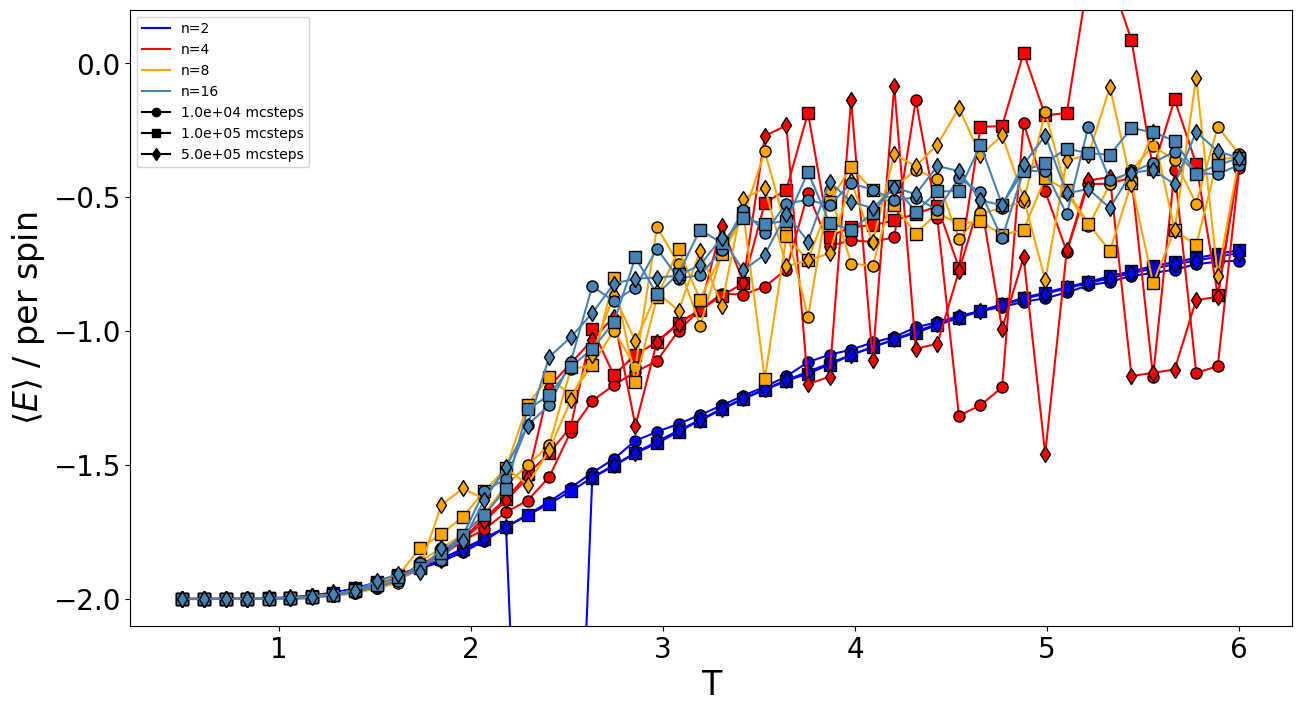

In [12]:
fig, ax = plot_convergence_size_steps(results, observable='Emean')
ax.set_ylim([-2.1, 0.2])

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle |M| \\rangle$ / per spin'>)

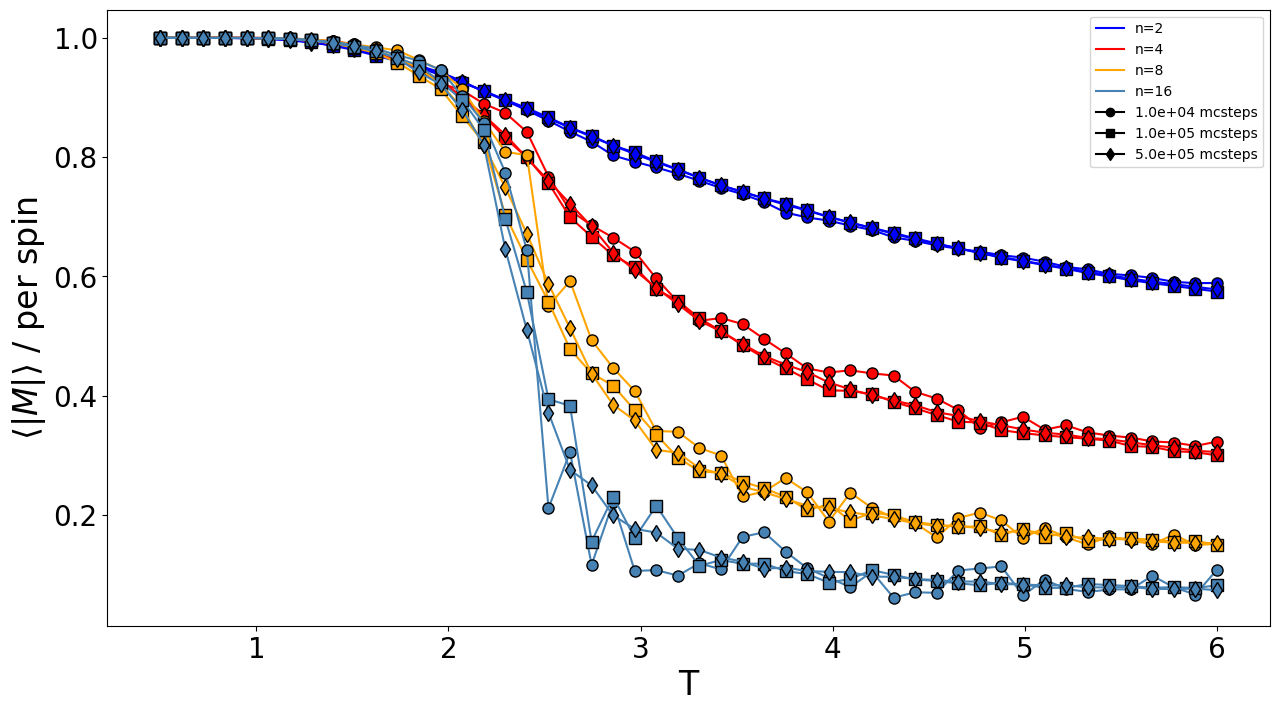

In [13]:
plot_convergence_size_steps(results, 'MabsMEAN', symbol='|M|')

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle C_v \\rangle$ / per spin'>)

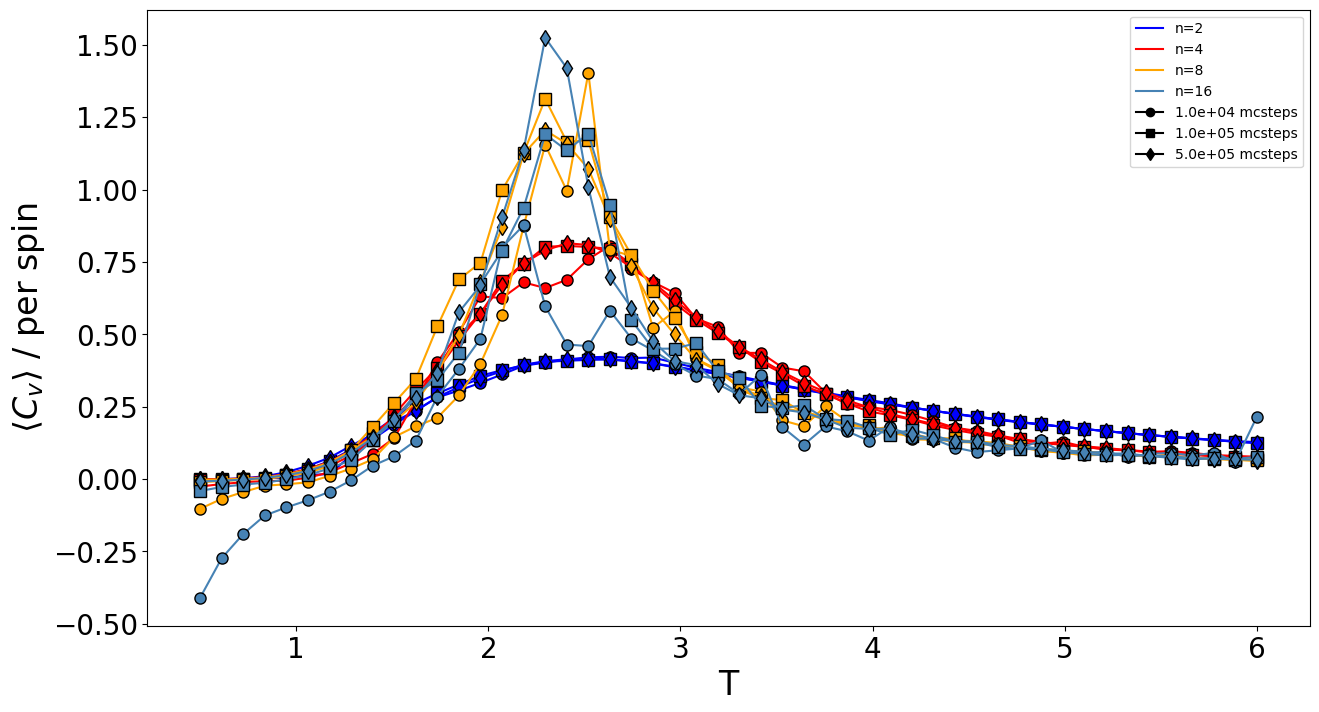

In [14]:
plot_convergence_size_steps(results, observable='CV', symbol='C_v')

In [40]:
for size, thisresult in results.items():
    for steps, result in thisresult.items():
        result['X'] = (result['M2acum']/size**2 - (result['MabsMEAN'])**2)/result['T']

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:xlabel='T', ylabel='$\\langle \\chi \\rangle$ / per spin'>)

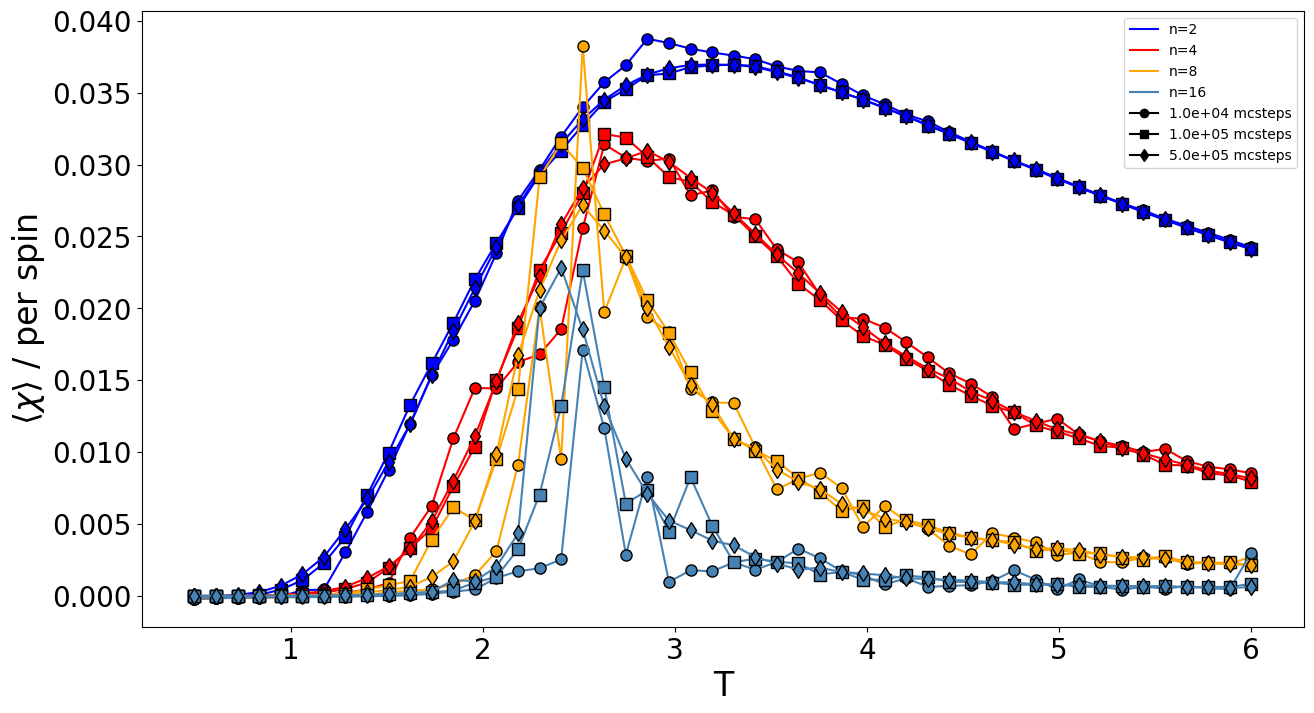

In [41]:
plot_convergence_size_steps(results, observable='X', symbol = '\chi')